### Проектная работа "Анализ бизнес-показателей"

**Описание проекта** \
Мы проводим анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу последние несколько месяцев компания терпит убытки. Моя задача как маркетингового аналитика — разобраться в причинах и помочь компании выйти в плюс. \

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: \
•	об их посещениях, \
•	их покупках за этот период, \
•	рекламные расходы. 

**Описание данных** \
В нашем распоряжении три датасета:
* visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
* orders_info_short.csv — информацию о заказах, 
* costs_info_short.csv — информацию о расходах на рекламу.

**Цель проекта:**
* оценить окупаемость рекламы, направленной на привлечение пользователей; 
* определить устройства, страны и рекламные каналы, которые могут оказывать негативное влияние на окупаемость рекламы; 
* определить возможные причины неэффективности привлечения пользователей; 
* сформулировать промежуточные рекомендации для рекламного отдела.

### Загрузите данные и подготовьте их к анализу

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
# загружаем данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [4]:
#изучим таблицу visits
display(visits)
print(visits.info())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


In [5]:
#изучим таблицу orders
display(orders)
print(orders.info())

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


In [6]:
#изучим таблицу costs
display(costs)
print(costs.info())

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


**Вывод:** пропусков нет, необходимо проверить наличие дубликатов, исправить формат даты во всех трех таблицах, переименовать столбцы.

#### Предобработка данных

In [7]:
# проверим наличие явных дубликатов
print(visits.duplicated().sum()) 
print(orders.duplicated().sum()) 
print(costs.duplicated().sum()) 

0
0
0


In [8]:
# изменим названия столбцов
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]


In [9]:
# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage:

In [10]:
# проверим наличие неявных дубликатов
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].sort_values().unique())
print(costs['channel'].sort_values().unique())

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']
['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds']


**Вывод:** \
Пропуски в данных, явные и неявные дубликаты отсутствуют.
Названия столбцов приведены к нижнему "змеиному" регистру.
Формат столбцов с датой приведен к типу "datetime".

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

#### Функции для вычисления значений метрик

In [11]:
# функция для создания профилей пользователей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [12]:
# функция для расчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для построения графиков

In [15]:
# функция для сглаживания данных

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [16]:
# функция для визуализации Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


### Исследовательский анализ данных

Составим профили пользователей на основе данных о стране пользователей, в т.ч. с выделением большей доли платящих пользователей, об устройствах, рекламных источниках. Определим минимальную и максимальную даты привлечения пользователей.

In [19]:
# составляем профили пользователей
events = []
profiles = get_profiles(visits, orders, events, costs)
print(profiles.head()) 
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()
print('Минимальная дата привлечения:', min_date)
print('Максимальная дата привлечения:', max_date)

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
Минимальная дата привлечения: 2019-05-01 00:00:41
Максимальная дата привлечения: 2019-10-27 23:59:04


**Вывод:** составили профили пользователей, вызвав функцию get_profiles. Минимальная и максимальная даты привлечения пользователей соответствуют началу и окончанию периода данных для анализа - 01.05.2019 и 27.10.2019.

In [20]:
def profiles_pivot(row):
    
    profiles_row = profiles.groupby(row).agg({'user_id': 'count', 'payer': ['sum', 'mean']}).sort_values([('payer', 'mean')], ascending = False)
    profiles_row.columns = ['users_count', 'payers_count', 'payers_share']
    profiles_row.payers_share=profiles_row.payers_share.apply(lambda x: format(x,'.2%'))
    
    return profiles_row

display(profiles_pivot('region'))
display(profiles_pivot('device'))
display(profiles_pivot('channel'))

,users_count,payers_count,payers_share
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


,users_count,payers_count,payers_share
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


,users_count,payers_count,payers_share
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


In [21]:
def profiles_pivot_test(row):
    
    profiles_row = profiles.groupby(row).agg({'user_id': 'count', 'payer': ['sum', 'mean']}).sort_values([('payer', 'mean')], ascending = False)
    profiles_row.columns = ['users_count', 'payers_count', 'payers_share']
    profiles_row = profiles_row.style.format({'payers_share': '{:.2%}'})
    
    return profiles_row

display(profiles_pivot('region'))

,users_count,payers_count,payers_share
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


**Вывод:** 
* региональный профиль представлен пользователями из 4 стран: США, Великобритания, Франция, Германия. Наибольшее число платящих пользователей - в США (100002), их доля составляет 6,9%. Наименьшая доля платящих пользователей во Франции - 3,8%. Меньше всего пользователей приложения в абсолютном выражении из Германии. 
* доступ в приложение осуществляется пользователями с Mac, iPhone, Android, PC, при этом наибольшая доля платящих пользователей использует Мас (6,4%). Пользователи РС реже готовы платить за приложение - их доля 5%. Владельцы iPhone - наибольшая по численности группа пользователей приложения: их количество превышает пользователей других устройств минимум в 1,5 раза. 
* ТОП-3 источников приходится на следующие каналы привлечения: *FaceBoom* (12%), *AdNonSense* (11%), *lambdaMediaAds* (10%). Наименьшая доля платящих пользователей привлечены через *OppleCreativeMedia* (2,7%) или пришли "сами" - органический трафик (2,1%). Отметим, что *lambdaMediaAds* и *AdNonSense* привлекли меньше всего пользователей, но при этом у этих источников высока доля платящих пользователей - 10,5% и 11,3% соответственно.

Резюмируя: лидером по числу пользователей является США, доля платящих пользователей - 6,9%, меньше всего платящих пользователей из Франции. Большинство пользователей приложения заходят с iPhone - их доля 36%, при этом больше всего платящих пользователей среди владельцев Мас - 6,4%, меньше всего - среди пользователей РС (5%). Число платящих пользователей, привлеченных "органически", занимает наименьшую долю - 2,1%. Чаще всего платят пользователи, пришедшие через FaceBoom - 12%. lambdaMediaAds и AdNonSense привлекли меньше всего пользователей, но при этом у этих источников высокая конверсия пользователей в покупателей - более 10%.

### Маркетинг

Посчитаем общую сумму расходов на маркетинг, их распределение по рекламным источникам, определим стоимость привлечения одного пользователя. Построим визуализации изменения расходов.

In [22]:
# расходы на маркетинг
print('Общие расходы на маркетинг:', round(costs['costs'].sum(),2))

Общие расходы на маркетинг: 105497.3


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


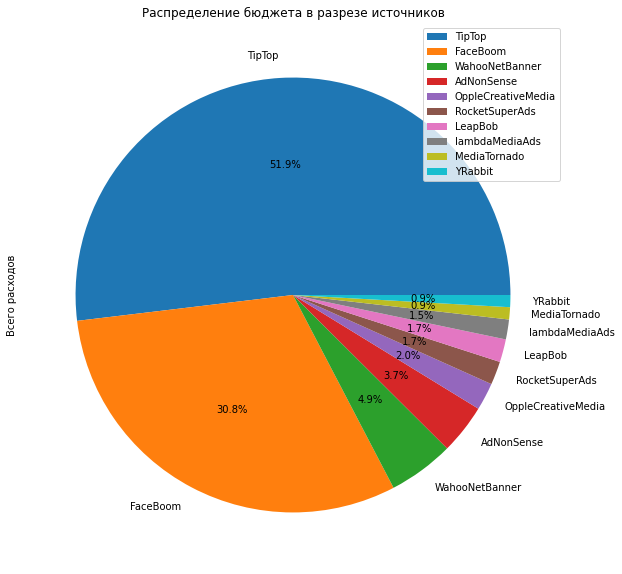

In [23]:
# распределение рекламного бюджета по источникам
costs_channel = costs \
               .pivot_table(index='channel', values='costs', aggfunc='sum') \
               .sort_values(by='costs', ascending=False)
display(costs_channel)
costs_channel_plot = costs_channel.plot(kind='pie', y='costs', figsize=(10,10), autopct='%1.1f%%')
plt.title('Распределение бюджета в разрезе источников')
plt.ylabel('Всего расходов')
plt.show()



**Вывод:** Больше 80% всех расходов на маркетинг затрачено на TipTop (52%)и FaceBoom (31%). При этом конверсия пользователей в покупателей у TipTop не входит в тройку лидеров и составляет менее 10%. Менее 1% расходов приходится на YRabbit и MediaTornado, доля платящих пользователей в которых составляет 3,8% и 3,6% соответственно.

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month_costs,,,,,,,,,,
2019-05-01,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
2019-06-01,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
2019-07-01,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
2019-08-01,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
2019-09-01,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week_costs,,,,,,,,,,
2019-04-25,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,281.40,742.5,27.09,57.60,34.75,136.890,479.0,73.8,76.5,105.6
2019-05-09,259.35,728.2,29.61,59.76,31.00,131.625,451.0,93.0,74.1,98.4
2019-05-16,275.10,760.1,28.98,58.80,31.00,142.155,572.6,85.8,66.6,101.6
2019-05-23,277.20,788.7,30.45,46.56,44.00,122.850,993.7,95.4,60.0,116.0


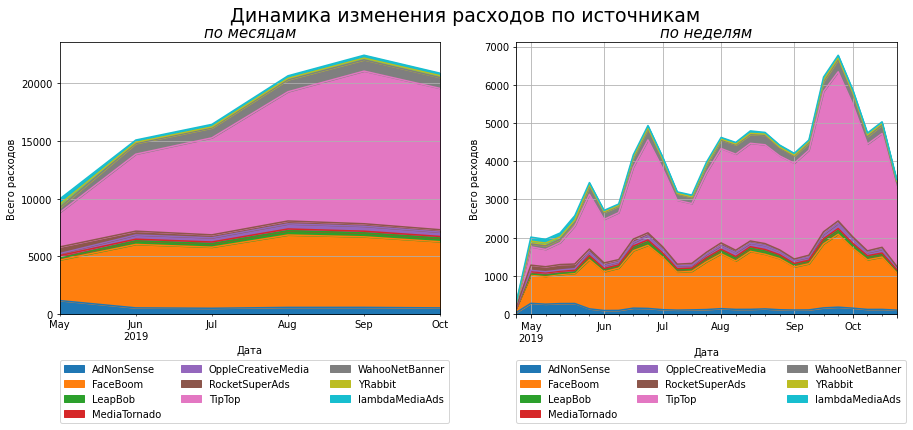

In [24]:
# добавим столбцы месяцев и недель
costs['month_costs'] = costs['dt'].astype('datetime64[M]') 
costs['week_costs'] = costs['dt'].astype('datetime64[W]')
 
# построим сводные таблицы для графиков
costs_monthly = costs.pivot_table(index=['month_costs'], columns='channel', values='costs', aggfunc='sum')
costs_weekly = costs.pivot_table(index=['week_costs'], columns='channel', values='costs', aggfunc='sum')
display(costs_monthly.head())
display(costs_weekly.head())
plt.subplots(figsize = (15, 5))
plt.suptitle('Динамика изменения расходов по источникам', fontsize=19)
 
costs_monthly.plot.area(ax = plt.subplot(1, 2, 1))
plt.ylabel('Всего расходов')
plt.xlabel('Дата')
plt.title('по месяцам', fontsize=15, fontstyle='italic')
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.grid()
 
 
costs_weekly.plot.area(ax = plt.subplot(1, 2, 2))
plt.ylabel('Всего расходов')
plt.xlabel('Дата')
plt.title('по неделям', fontsize=15, fontstyle='italic')
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.grid()
 
plt.show()

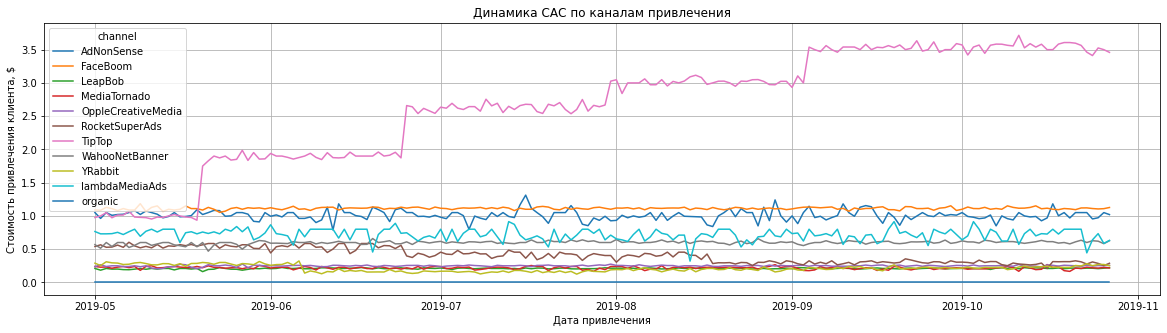

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Общие расходы на привлечение из таблицы costs: 105497.30
0.6870317251014001


In [25]:
# строим график истории изменений CAC по каналам привлечения
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(20, 5))
plt.ylabel('Стоимость привлечения клиента, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

source_cac = profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)
display(source_cac)

observation_date = profiles['first_ts'].max().date()

print(
   'Общие расходы на привлечение из таблицы costs: {:.2f}'.format(
       costs.query('dt <= @observation_date')['costs'].sum()
   )
)
print(source_cac.mean())

**Вывод:** 
* общие расходы на маркетинг составили 105497 долл.США
* больше 80% всех расходов на маркетинг затрачено на TipTop (52%)и FaceBoom (31%) с конверсией 9,6% и 12,2%. Менее 1% расходов приходится на YRabbit и MediaTornado, доля платящих пользователей в которых составляет 3,8% и 3,6% соответственно;
* самая большая стоимость привлечения была через канал TipTop (2,8 долл.), самая низкая - через LeapBob (0,2 долл.).
* стоимость привлечения во всех каналах была относительно стабильной, кроме TipTop, где примерно каждый месяц происходит увеличение рекламного бюджета (финансирование, судя по графику динамики изменения расходов по неделям, происходит на 2 неделе месяца).

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы.

#### Окупаемость рекламы в целом

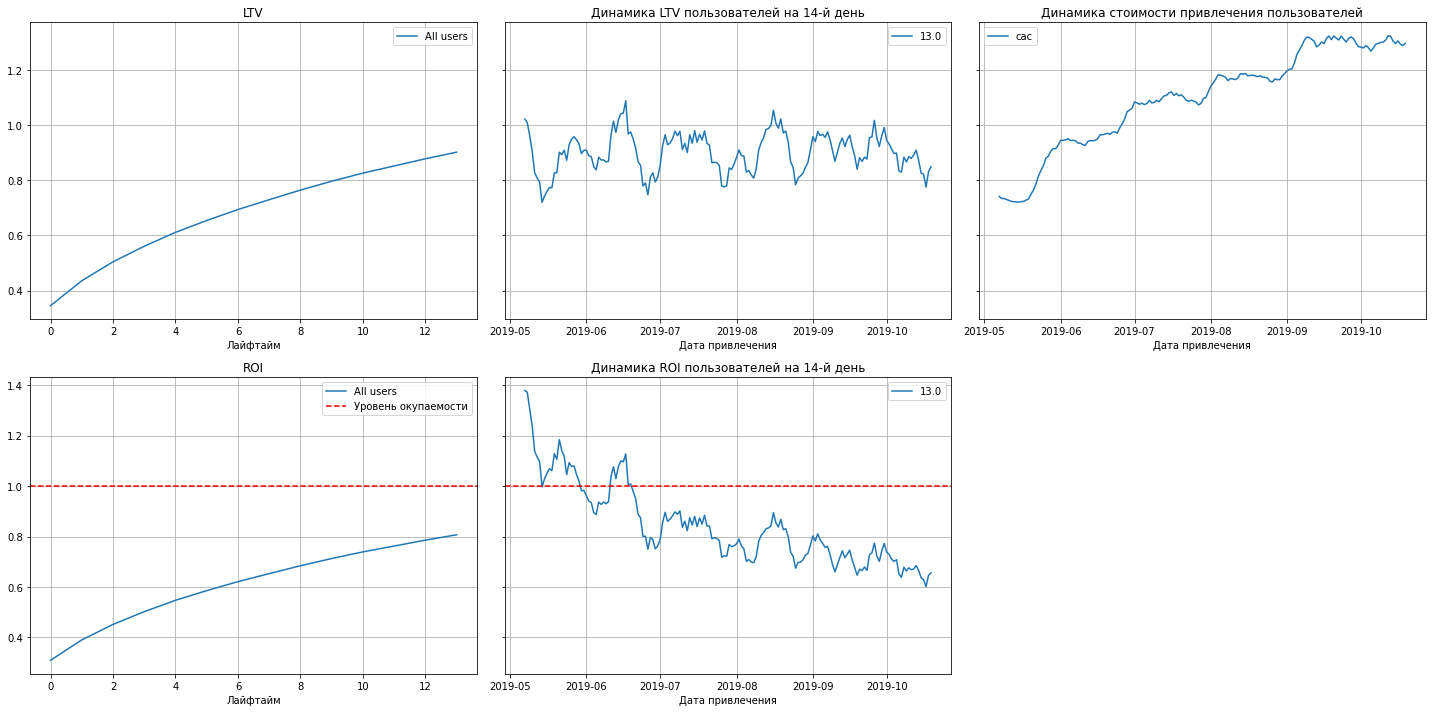

In [26]:
# зададим момент и горизонт анализа
observation_date=datetime(2019, 11, 1).date()
horizon_days=14

#исключим органических пользователей 
profiles=profiles.query('channel != "organic"')

# считаем LTV и ROI 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date , horizon_days 
)

#Cтроим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history,horizon_days) 

**Вывод:** кривая LTV постоянно растёт, как и ROI, значит, мы верно определили момент и горизонт анализа данных и построили графики.
* Реклама не окупается: ROI на 14-день составляет чуть более 80%
* Стоимость привлечения выросла почти в 2 раза: с 0,7 до 1,3

#### Конверсия и удержание пользователей

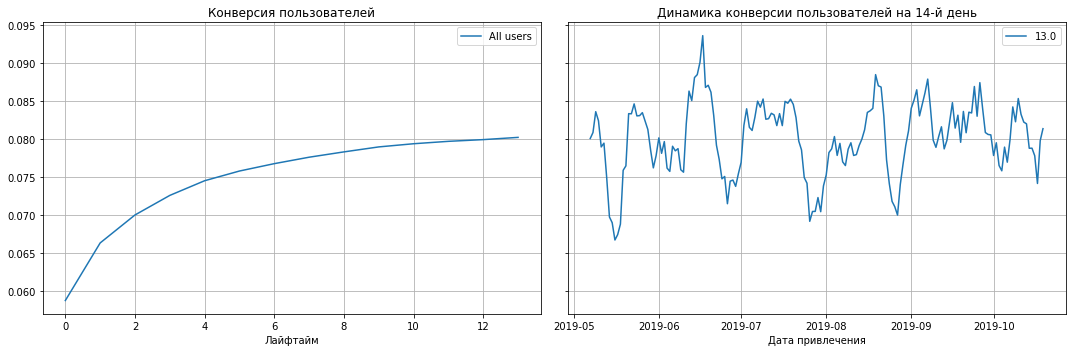

In [27]:
# изобразим графики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days
)

plot_conversion(conversion, conversion_history, horizon_days) 


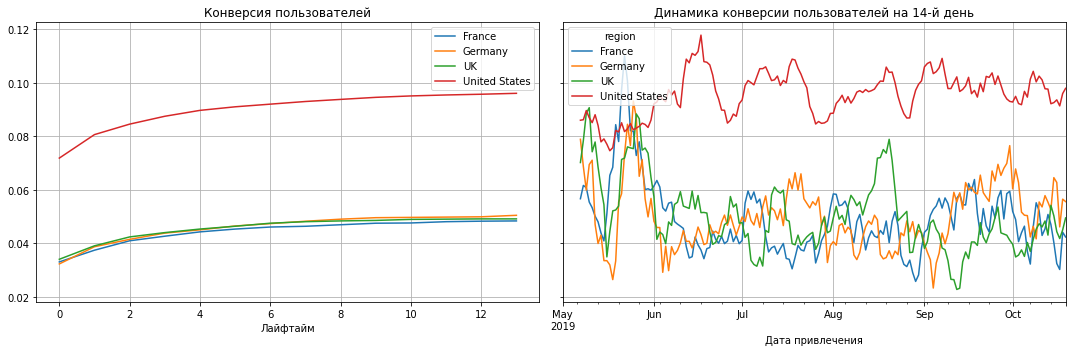

In [28]:
# строим графики конверсии в разбивке по странам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

plot_conversion(conversion, conversion_history, horizon_days) 

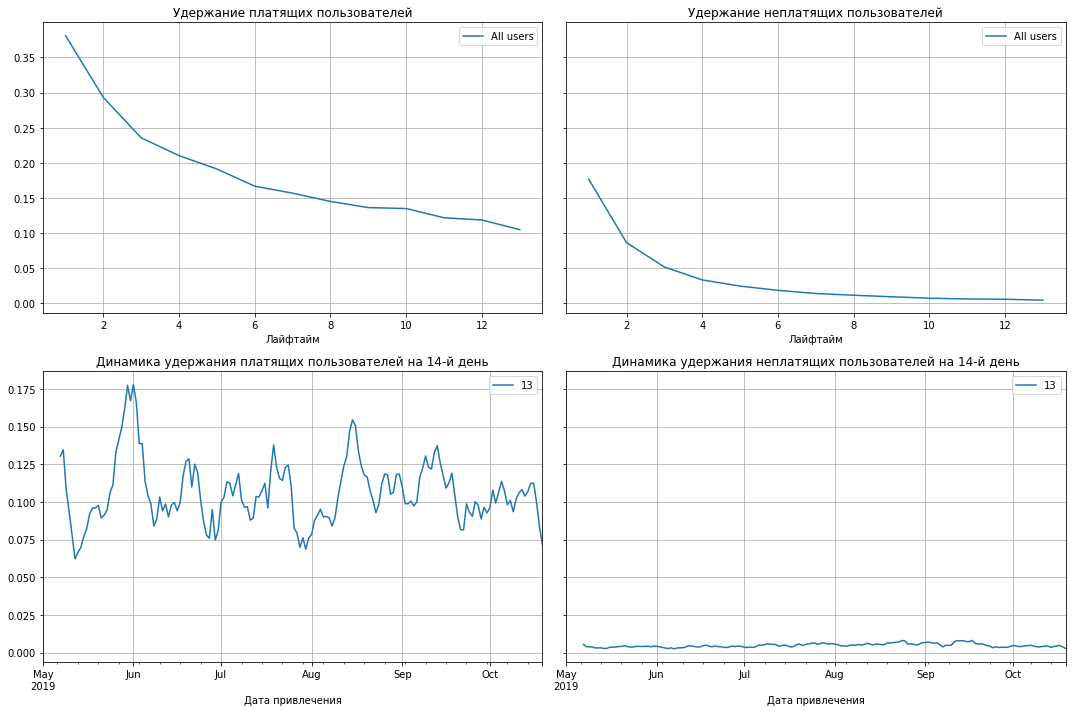

In [29]:
# изобразим графики Retention Rate

retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention, retention_history, horizon_days) 


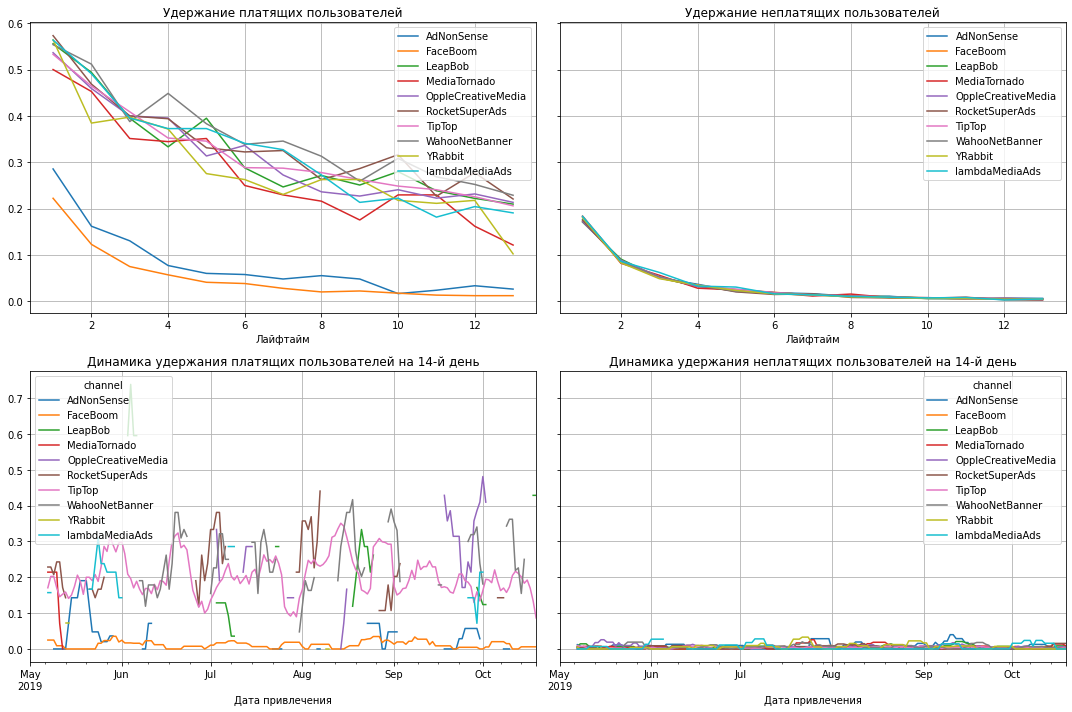

In [30]:
# строим графики удержания с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 


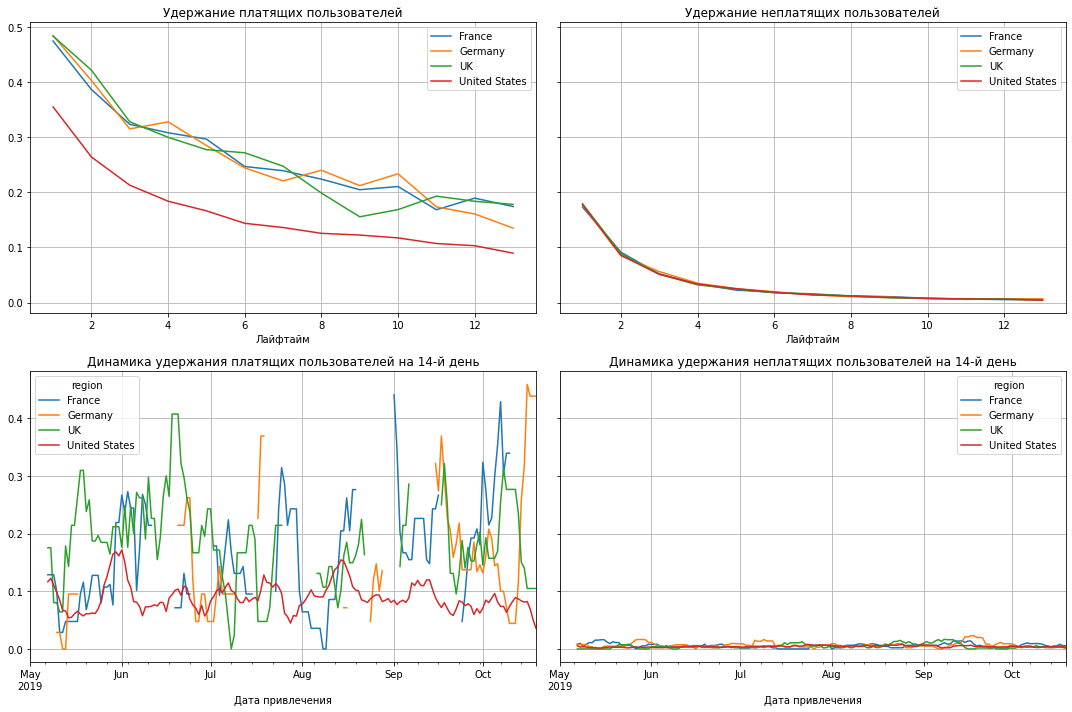

In [31]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

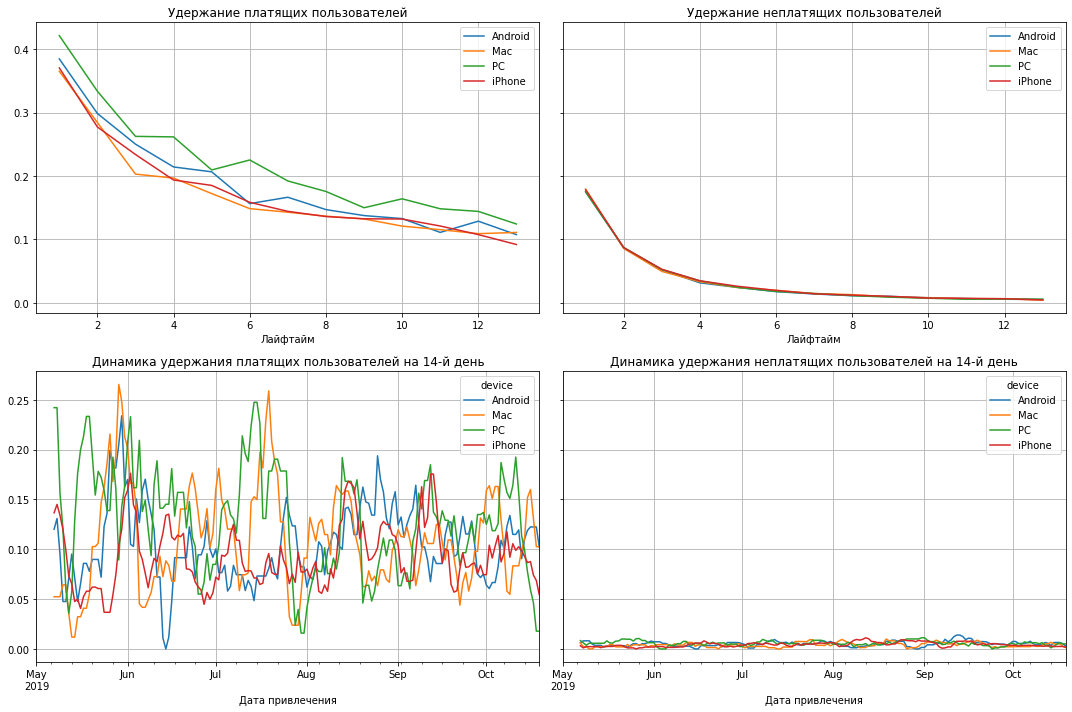

In [32]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** 
* кривая конверсии растет и не превышает 100%;
* выше всего CR среди пользователей из США;
* кривая удержания платящих пользователей выше, чем неплатящих, обе кривые постепенно снижаются;
* ниже всего удержание платящих пользователей из США и пользователей, привлеченных через каналы *AdNonSense* и *FaceBoom*, при том, что на них приходятся наибольшие доли платящих пользователей.


#### Окупаемость рекламы по устройствам

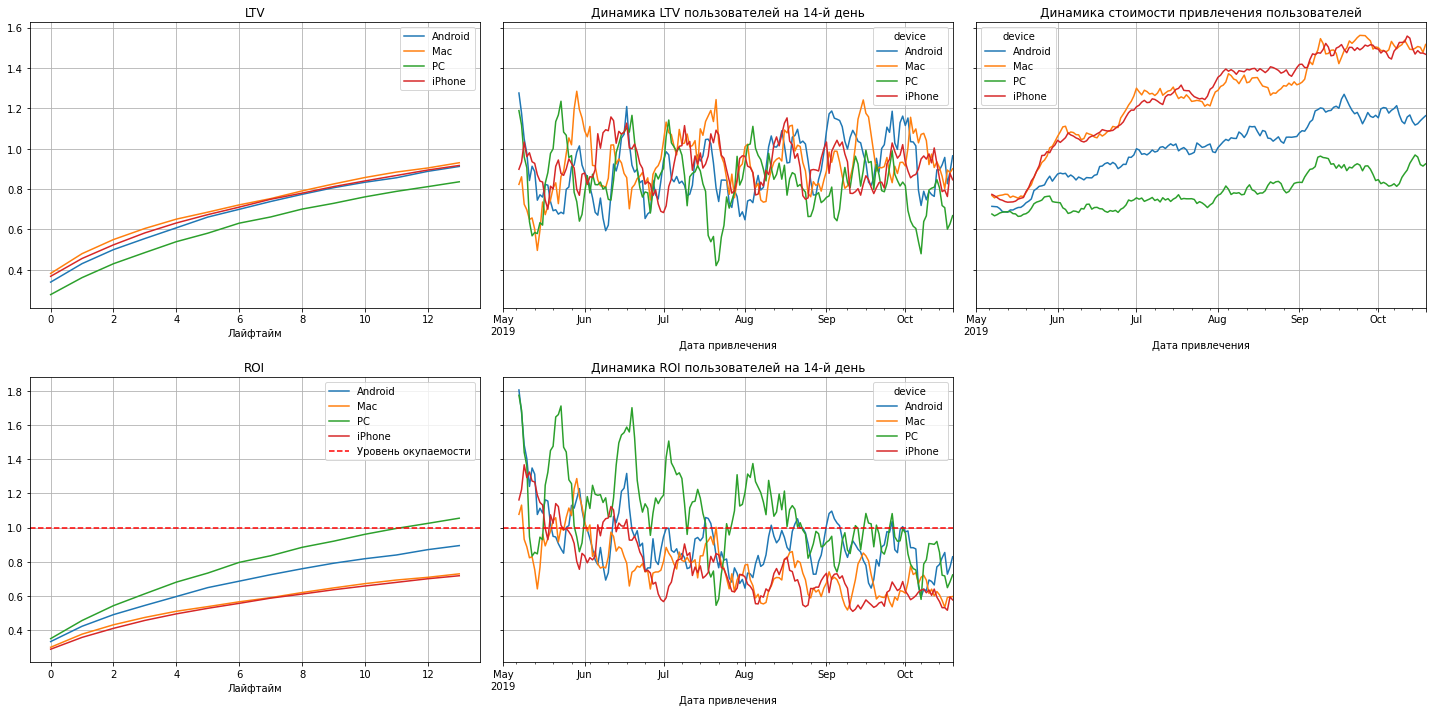

In [33]:
# считаем LTV и ROI 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date , horizon_days, dimensions=['device'] 
)

#Cтроим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history,horizon_days)

#### Окупаемость рекламы по странам

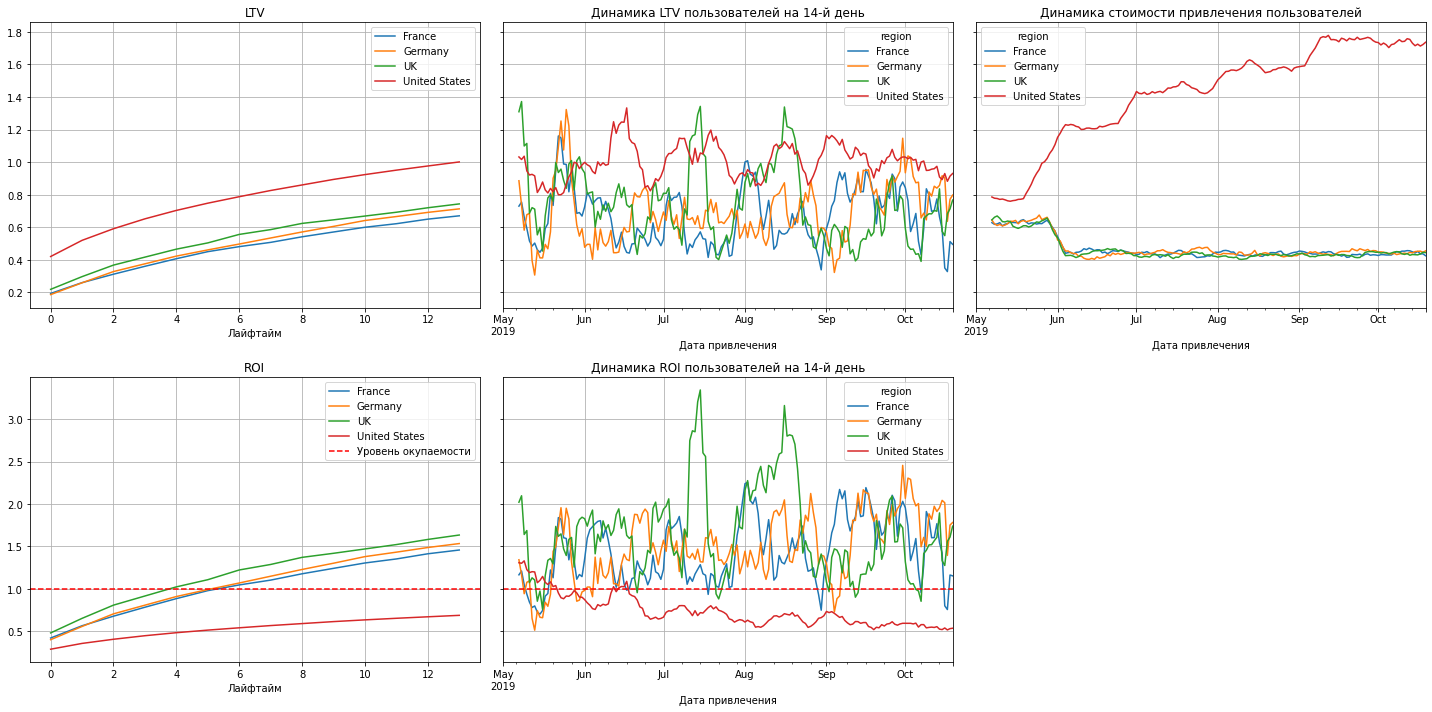

In [34]:
# считаем LTV и ROI 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date , horizon_days, dimensions=['region'] 
)

#Cтроим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history,horizon_days)

#### Окупаемость рекламы по каналам

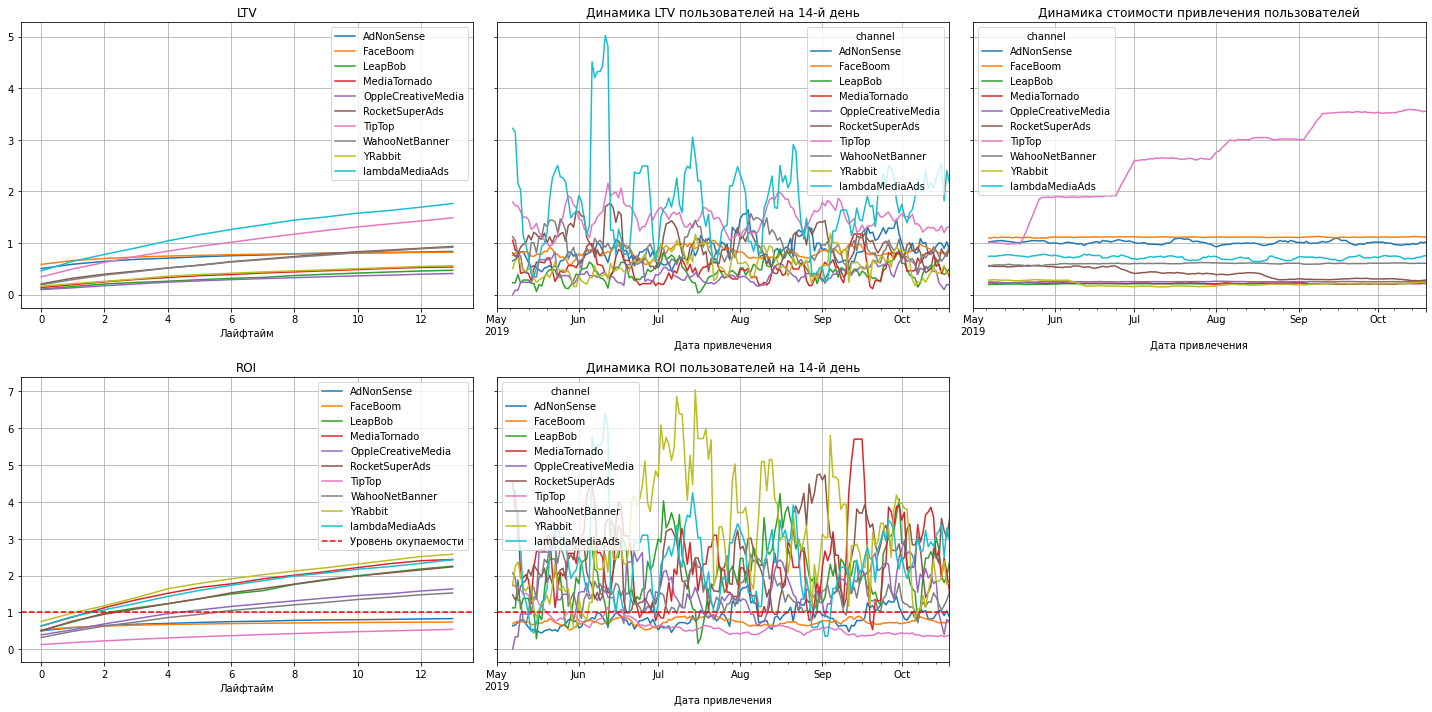

In [35]:
# считаем LTV и ROI 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date , horizon_days, dimensions=['channel'] 
)

#Cтроим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history,horizon_days)

In [36]:
helpful=orders.merge(visits,on='user_id',how='left')
display(helpful.pivot_table(index='channel',columns='region', values='revenue',aggfunc='sum'))

region,France,Germany,UK,United States
channel,,,,
AdNonSense,4785.96,5767.71,5940.12,NaN
FaceBoom,NaN,NaN,NaN,6.543472e+04
LeapBob,49574.67,33945.66,65462.66,NaN
MediaTornado,NaN,NaN,NaN,1.005332e+05
OppleCreativeMedia,42428.75,31867.80,57306.45,NaN
RocketSuperAds,NaN,NaN,NaN,2.362996e+05
TipTop,NaN,NaN,NaN,1.121218e+06
WahooNetBanner,128528.89,113449.44,129488.40,NaN
YRabbit,NaN,NaN,NaN,1.114128e+05


**Вывод:**
* на 12-й день окупаться стало только привлечение пользователей РС, в то время как стоимость привлечения пользователей Mac и Iphone демонстрирует кратный рост, что может объяснять то, что ROI по ним ниже 100%.
* только среди пользователей из США ROI ниже уровня окупаемости, что может объясняться ростом стоимости привлечения пользователей в 3 раза, в то время как в остальных странах этот показатель имеет снижающуюся динамику.
* также таблица выше объясняет нерентабельность привлеченных пользователей через каналы *AdNonSense*, *FaceBoom*, *TipTop*: последние две генерируют прибыль только в США.

### Выводы

#### Предобработка данных
Пропуски в данных, явные и неявные дубликаты отсутствуют. Названия столбцов приведены к нижнему "змеиному" регистру. Формат столбцов с датой приведен к типу "datetime".

#### Исследовательский анализ данных
Составили профили пользователей. Минимальная дата привлечения пользователей - 01.05.2019, максимальная дата - 27.10.2019.

***Профиль пользователей***
* Наибольшее число платящих пользователей в США - 6,9% (6 902 пользователя). Наименьшая доля платящих пользователей во Франции - 3,8% (663 чел.).
* Наибольшая доля платящих пользователей использует Мас - 6,4% (1 912 польз.). Пользователи РС реже готовы платить за приложение - их доля 5%, или 1 537 чел. Владельцы iPhone - наибольшая группа пользователей приложения: их количество превышает пользователей других устройств минимум в 1,5 раза и составляет 54 479 пользователей, из них платят за приложение 6,21%.
* ТОП-3 платящих пользователей приходится на: FaceBoom (12%, из 29 144 пользователей платят 3 557), AdNonSense (11%, или 440 пользователей), lambdaMediaAds (10%, или 225 платящих пользователей). Отметим, что lambdaMediaAds и AdNonSense привлекли меньше всего пользователей (менее 4000), но при этом у этих источников высока доля платящих пользователей - 10,5% и 11,3% соответственно. Меньше всего платящих пользователей у OppleCreativeMedia - 2,71%, или 233 пользователя. Доля платящих пользователей органического трафика - 2%, или 1 160 пользователей.

#### Маркетинговый анализ
* общие расходы на маркетинг - 105 497 долл.США
* больше 80% затрачено на TipTop (52%, или 54 751 долл.США) и FaceBoom (31%, или 32 445 долл.США) с конверсией 9,6% и 12,2%, при этом эти каналы не охватывают другие страны, кроме США;
* самая большая стоимость привлечения была через канал TipTop (2,8 долл.), самая низкая - через LeapBob (0,2 долл.) при средней САС - 0,8 долл.
* стоимость привлечения во всех каналах была относительно стабильной, кроме TipTop, где САС постоянно растет.
* общий CR = 0,08, удержание = 0,1 
* выше всего CR среди пользователей из США (0,095) при одновременном росте САС в 3 раза до 1,7, в то время как в других странах САС снижается;
* ниже всего удержание платящих пользователей из США (0,09) и пользователей, привлеченных через каналы *AdNonSense* (0,03) и *FaceBoom* (0,01), при том, что на них приходятся наибольшие доли платящих пользователей.
* удержание пользователей Мас и iPhone ниже, чем пользователей иных девайсов, в то время как их САС увеличивается.


#### Окупаемость рекламы
* в целом, реклама **не окупается**: ROI на 14-день составляет чуть более 80%, при этом стоимость привлечения выросла почти в 2 раза: с 0,7 до 1,3
* **окупилось** только привлечение пользователей РС (1,05),
* **не окупилось** только привлечение пользователей из США,
* **не окупилось** привлечение пользователей через *AdNonSense, FaceBoom, TipTop*.

#### Возможные источники проблем:
* неэффективное распределение рекламного бюджета: более 80% средств направляется на источники привлекающие пользователей из одной страны (США) с наименьшим уровнем их удержания в отличие от пользователей из других стран
* проблема с оплатой на устройствах компании Apple и анализ иных проблем технического характера
* возможная блокировка рекламных каналов в стране потенциальных пользователей
* неудовлетворенность пользователей приложения его интерфейсом или иными характеристиками

#### Возможные рекомендации для отдела маркетинга
* изучить возможные проблемы с пользованием приложения и оплатой в нем пользователей из США
* провести анализ совместимости приложения и ОС у пользователей Мас и iPhone на предмет возможных технических ошибок
* провести оценку эффективности рекламной кампании и определить точки потенциала рекламных источников (lambdaMediaAds, RocketSuperAds - довольно высокая доля платящих пользователей, обеспечивающая окупаемость) и точки источников-аутсайдеров (TipTop,FaceBoom, AdNonSense - несмотря на высокую долю платящих пользователей реклама и привлечение через данные источники не окупается ввиду высокой стоимости привлечения).